In [26]:
import numpy as np
import matplotlib.pylab as plt
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity

import QLCstuff as QLC

In [2]:
%matplotlib notebook

### Hertz-Knudsen

$$
\nu_{kin} = P_{vap}^{eq} \bigl ( {M \over {2 \pi RT}} \bigr )^{1/2}
$$

micrometer / second


<IPython.core.display.Javascript object>


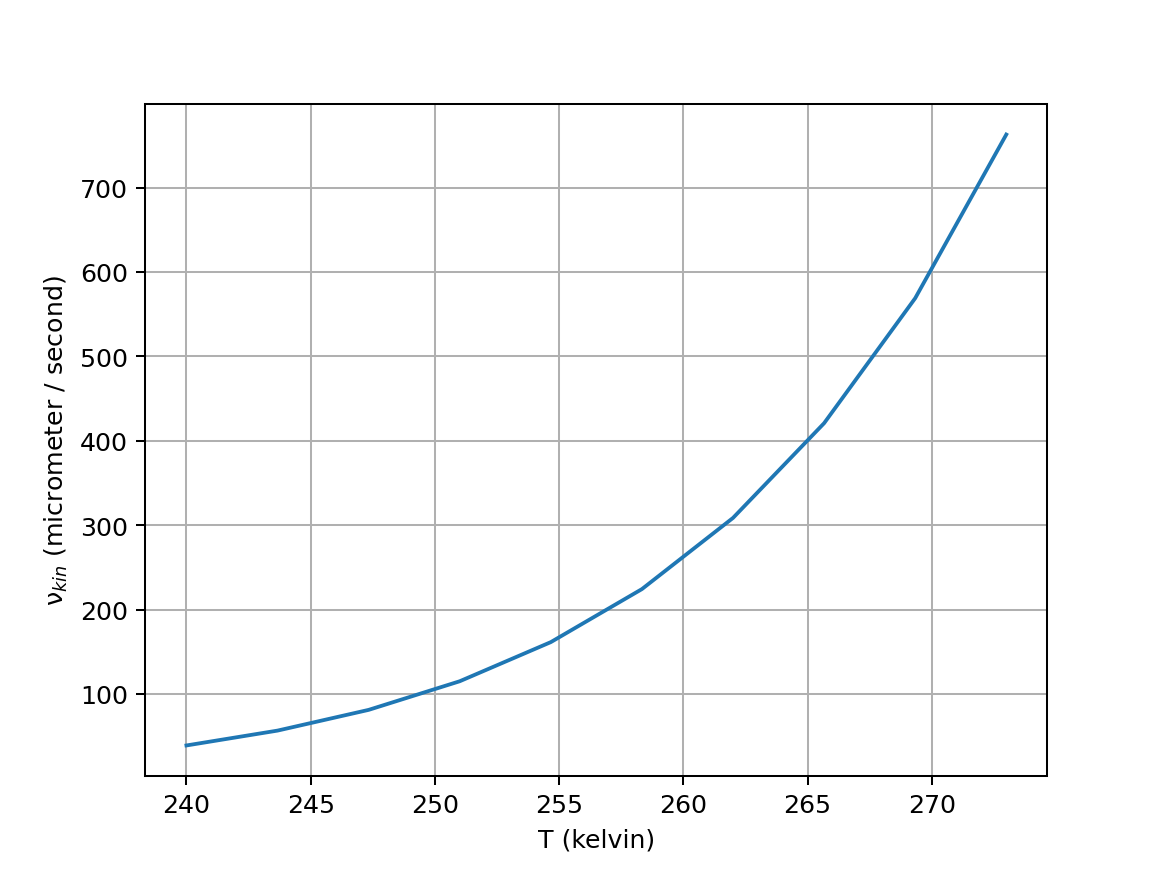

Text(0.5, 0, 'T (kelvin)')

In [27]:
T = AssignQuantity(np.linspace(240,273,10),'K')
nu_kin = QLC.get_nu_kin(T,AssignQuantity)
print(nu_kin.units)

plt.figure()
plt.plot(T.magnitude,nu_kin.magnitude)
plt.grid(True)
plt.ylabel('\u03BD'+r'$_{kin}$ ('+str(nu_kin.units)+')')
plt.xlabel('T ('+str(T.units)+')')

In [ ]:
# # This is the formula from https://en.wikipedia.org/wiki/Hertz%E2%80%93Knudsen_equation
# nu_kin = P_vapor_eq/(2*np.pi*M*R*T)**.5
# nu_kin.ito('mol/second/micrometer^2')
# print(nu_kin.units)

# nu_kin *= M
# print(nu_kin.units)

# nu_kin /= rho
# nu_kin.ito('micrometer/second')
# print(nu_kin.units)

In [3]:
# def get_nu_kin(T,AssignQuantity):
#     P3 = AssignQuantity(611,'Pa'); print(P3)
#     T3 = AssignQuantity(273,'K')
#     R = AssignQuantity(8.314,'J/mol/K'); print(R)
#     M = AssignQuantity(18,'g/mol')
#     NA = AssignQuantity(6.02e23,'1/mol')
#     rho = AssignQuantity(0.9,'g/cm^3')
    
#     # Clausius-Clapeyron
#     Delta_H_sub = AssignQuantity(50,'kJ/mol')
#     P_vapor_eq = P3*np.exp(-Delta_H_sub/R*(1/T-1/T3)); print(P_vapor_eq)
    
#     nu_kin = P_vapor_eq*M**.5/(2*np.pi*R*T)**.5
#     nu_kin.ito('gram / micrometer ** 2 / second')
    
#     nu_kin /= rho
#     nu_kin.ito('micrometer/second')

#     return(nu_kin)